In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas
import numpy

In [18]:
def vocabulary_size(data, column="Global_CogID"):
    """Count different words in vocabulary."""
    return len(set(data[column]))

In [19]:
def semantic_width(data, column="Global_CogID"):
    """Calculate average synonym count.

    Calculate the average weighted semantic width in the language
    represented by data.

    """
    width = 0
    m = 0
    for form, meanings in data.groupby(column):
        width += meanings["Weight"].sum()**2/(meanings["Weight"]**2).sum()
        m += 1
    return width/m

In [20]:
def synonymity(data):
    """Calculate average synonym count.

    Calculate the average weighted synonym count in the language
    represented by data.

    """
    return semantic_width(data, column="Feature_ID")

In [21]:
clics_words = pandas.read_csv("/home/gereon/Downloads/words.csv")
clics_words["Weight"] = 1

clics_vocabulary = []
clics_semantic_width = []
clics_synonymity = []
for language, words in clics_words.groupby("LanguageId"):
    clics_vocabulary.append(vocabulary_size(words, "ClicsValue"))
    clics_semantic_width.append(semantic_width(words, "ClicsValue"))
    clics_synonymity.append(semantic_width(words, "ConcepticonGloss"))

Clics: 1317.4±805.2
Simulation: 760.6±252.4


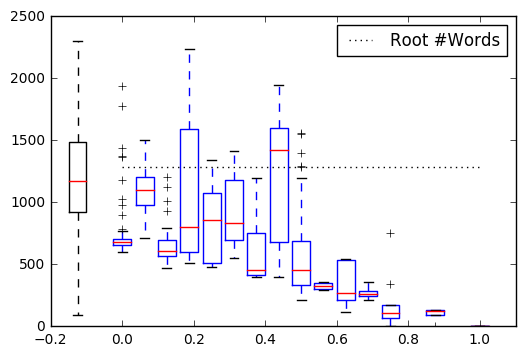

In [22]:
import os
n = {}
for file in os.listdir("../"):
    parts = file.split("-")
    if len(parts) == 5:
        all_data = pandas.read_csv(
            os.path.join("..", file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        p = float(parts[3])
        for language_id, language_data in all_data.groupby("Language_ID"):
            if language_id in ["S","T"]:
                n.setdefault(p, []).append(vocabulary_size(language_data))
plt.boxplot([clics_vocabulary], positions=[-0.125], widths=0.05,
            sym='', boxprops={"color": "k"}, whiskerprops={"color": "k"},
            manage_xticks=False)

plt.boxplot(list(n.values()), positions=list(n.keys()), widths=0.05, manage_xticks=False)

plt.plot([0, 1], [1284, 1284], 'k:', label="Root #Words")

plt.xlim(-0.2, 1.1)
plt.legend()

print("Clics: {:0.1f}±{:0.1f}".format(
    numpy.mean(clics_vocabulary), numpy.std(clics_vocabulary)))
print("Simulation: {:0.1f}±{:0.1f}".format(numpy.mean(n[0]), numpy.std(n[0])))

Simulation: 6.1±1.4


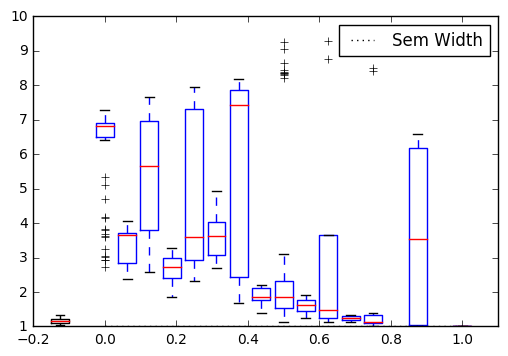

In [23]:
import os
n = {}
for file in os.listdir("../"):
    parts = file.split("-")
    if len(parts) == 5:
        all_data = pandas.read_csv(
            os.path.join("..", file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        p = float(parts[3])
        for language_id, language_data in all_data.groupby("Language_ID"):
            if language_id in ["S","T"]:
                n.setdefault(p, []).append(semantic_width(language_data))
plt.boxplot([clics_semantic_width], positions=[-0.125], widths=0.05,
            sym='', boxprops={"color": "k"}, whiskerprops={"color": "k"},
            manage_xticks=False)

plt.boxplot(list(n.values()), positions=list(n.keys()), widths=0.05, manage_xticks=False)

plt.plot([0,1], [1, 1], "k:", label="Sem Width")
plt.xlim(-0.2, 1.1)
plt.legend()
print("Simulation: {:0.1f}±{:0.1f}".format(numpy.mean(n[0]), numpy.std(n[0])))

Simulation: 4.1±0.4


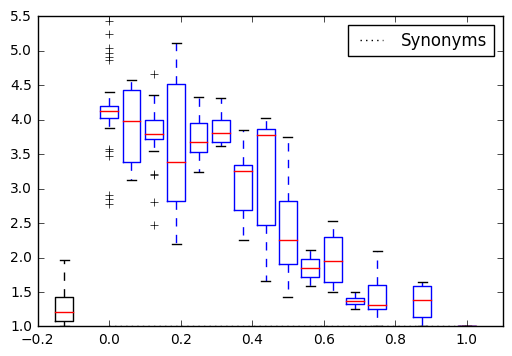

In [24]:
import os
n = {}
for file in os.listdir("../"):
    parts = file.split("-")
    if len(parts) == 5:
        all_data = pandas.read_csv(
            os.path.join("..", file),
            sep="\t",
            na_values=[""],
            keep_default_na=False,
            encoding='utf-8')

        p = float(parts[3])
        for language_id, language_data in all_data.groupby("Language_ID"):
            if language_id in ["S","T"]:
                n.setdefault(p, []).append(synonymity(language_data))
plt.boxplot([clics_synonymity], positions=[-0.125], widths=0.05,
            sym='', boxprops={"color": "k"}, whiskerprops={"color": "k"},
            manage_xticks=False)

plt.boxplot(list(n.values()), positions=list(n.keys()), widths=0.05, manage_xticks=False)

plt.plot([0,1], [1, 1], "k:", label="Synonyms")
plt.xlim(-0.2, 1.1)
plt.legend()
print("Simulation: {:0.1f}±{:0.1f}".format(numpy.mean(n[0]), numpy.std(n[0])))